## GENERATE LABELS FOR SPLIT TRAINING DATA

In [24]:
import csv
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('../train_data/bizfeatures_meanfeature.csv')
train_label_df = pd.read_csv('train.csv')
test_data = pd.read_csv('../test_data/bizfeaturestest_meanfeature.csv')

In [3]:
train_data = train_data.sort_values(by='business_id')
train_label_df = train_label_df.sort_values(by='business_id')
test_data = test_data.sort_values(by='business_id')

In [4]:
def str_to_nplist(string):
    string = string.replace("[", "")
    string = string.replace("]", "")
    string = string.split(',')
    return np.asarray(string).astype(np.float32)

In [5]:
def convertlabelsfromString(s, ind):
    if type(s) == str:
        s = s.split(" ")
        s = [int(x) for x in s]
        return s
    else:
        return []

In [6]:
#randomly breaking the dataset into 80:20 ratio for training and testing
msk = np.random.rand(len(train_data)) < 0.8
train_new_model = train_data[msk]
test_new_model = train_data[~msk]
label_train_new_model = train_label_df[msk]
label_test_new_model = train_label_df[~msk]

In [7]:
mean_features = np.asarray([str_to_nplist(i) for i in train_new_model['feature']])
labels = label_train_new_model['labels'].values
mean_features_test = np.asarray([str_to_nplist(i) for i in test_new_model['feature']])
labels_test = label_test_new_model['labels'].values

In [8]:
X = mean_features
Y = labels
label_binarizer = MultiLabelBinarizer()

In [9]:
Y = [convertlabelsfromString(Y[i],i) for i in range(Y.shape[0])]
Y = label_binarizer.fit_transform(Y)

In [10]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear'))
classifier.fit(X, Y)
prediction = classifier.predict(mean_features_test)

In [11]:
values = label_binarizer.inverse_transform(prediction)
inv_values = label_binarizer.fit_transform(values)

In [12]:
Y1 = [convertlabelsfromString(labels_test[i],i) for i in range(labels_test.shape[0])]
Y1 = label_binarizer.fit_transform(Y1)

In [13]:
f1_score(Y1,inv_values,average='micro')

0.72562632055538778

## GENERATE LABELS FOR TEST DATA

In [14]:
mean_features_train = np.asarray([str_to_nplist(i) for i in train_data['feature']])
labels_train = train_label_df['labels'].values
mean_features_test = np.asarray([str_to_nplist(i) for i in test_data['feature']])

In [15]:
X = mean_features_train
Y = labels_train
label_binarizer = MultiLabelBinarizer()

In [16]:
Y = [convertlabelsfromString(Y[i],i) for i in range(Y.shape[0])]
Y = label_binarizer.fit_transform(Y)

In [17]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear'))
classifier.fit(X, Y)
prediction = classifier.predict(mean_features_test)

In [18]:
values = label_binarizer.inverse_transform(prediction)
inv_values = label_binarizer.fit_transform(values)

In [19]:
values

[(1, 2, 6, 7),
 (0, 3, 5, 8),
 (1, 2, 4, 5, 6, 7),
 (0, 3, 5, 6, 8),
 (1, 2, 4, 5, 6, 7, 8),
 (8,),
 (0, 8),
 (1, 2, 5, 6),
 (1, 2, 4, 5, 6, 7),
 (1, 2, 3, 5, 6, 7, 8),
 (6, 8),
 (3, 5),
 (0, 8),
 (2, 3, 4, 5, 6, 7),
 (1, 2, 4, 5, 6, 7),
 (0, 1, 2, 3, 5, 6, 8),
 (1, 2, 3, 4, 5, 6, 7),
 (1, 2, 4, 5, 6, 7),
 (1, 2, 4, 6, 7, 8),
 (1, 2, 5, 6, 7),
 (1, 2, 5, 8),
 (0, 2, 3, 5, 8),
 (0, 3),
 (1, 2, 4, 5, 6, 7),
 (1, 2, 3, 5, 6, 8),
 (1, 2, 3, 5, 6),
 (0, 8),
 (1, 2, 3, 5, 6, 7, 8),
 (8,),
 (6, 7, 8),
 (1, 2, 5, 6, 7),
 (2, 4, 5, 6, 8),
 (2, 5, 6, 8),
 (0, 1, 2, 8),
 (0, 3, 4, 5, 8),
 (8,),
 (1, 2, 3, 4, 5, 6, 7),
 (0, 8),
 (1, 2, 3, 5, 6, 7),
 (0, 1, 2, 6, 7, 8),
 (1, 2, 3, 4, 5, 6),
 (3, 5, 6, 8),
 (0, 1, 2, 8),
 (0, 1, 2, 5, 6, 7),
 (0, 1, 3, 8),
 (0, 6, 8),
 (2, 6, 7),
 (0, 3, 8),
 (1, 2, 3, 5, 6, 7),
 (0, 3, 8),
 (1, 2, 3, 4, 5, 6, 7),
 (1, 2, 3, 4, 5, 6, 7),
 (1, 3, 5, 6, 7),
 (1, 3, 4, 5, 6, 7, 8),
 (4, 6),
 (2, 3, 5, 6, 8),
 (2, 3, 5, 6, 7),
 (0, 8),
 (1, 3, 4, 5, 6),
 (1, 2, 3, 4, 5,

In [20]:
d = dict()
for i in range(0,len(values)):
    for j in range(0,len(values[i])):
        if values[i][j] in d.keys():
            d[values[i][j]] +=1
        else:
            d[values[i][j]] = 1

In [21]:
d

{0: 1840,
 1: 4649,
 2: 4919,
 3: 3670,
 4: 2328,
 5: 5680,
 6: 6109,
 7: 2340,
 8: 4576}

In [22]:
len(values)

7962

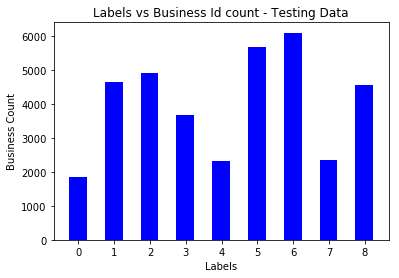

In [26]:
a = []
b = []
for key, value in sorted(d.items()):
    a.append(key)
    b.append(value)

a = np.array(a)
b = np.array(b)

N = len(a)
business_count = b

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, business_count, width, color='b')
ax.set_ylabel('Business Count')
ax.set_xlabel('Labels')
ax.set_title('Labels vs Business Id count - Testing Data')
ax.set_xticks(ind + width / 32)
ax.set_xticklabels(a)
plt.show()